In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
data=pd.read_excel('etab2017.xlsx',engine='openpyxl')

In [3]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data = data.select_dtypes(exclude=['object'])

In [6]:
data=data.drop('COM',axis=1)
data=data.drop('REG',axis=1)
data=data.drop('DEP',axis=1)

In [8]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
ET_TOT    0.329926
ET_AZ     0.113628
ET_DE     0.358490
ET_C1     0.392949
ET_C2     0.025374
            ...   
EFF_LZ    0.202114
EFF_MN    0.258821
EFF_OQ    0.240947
EFF_RU    0.270603
NTLBIN    1.000000
Name: NTLBIN, Length: 131, dtype: float64


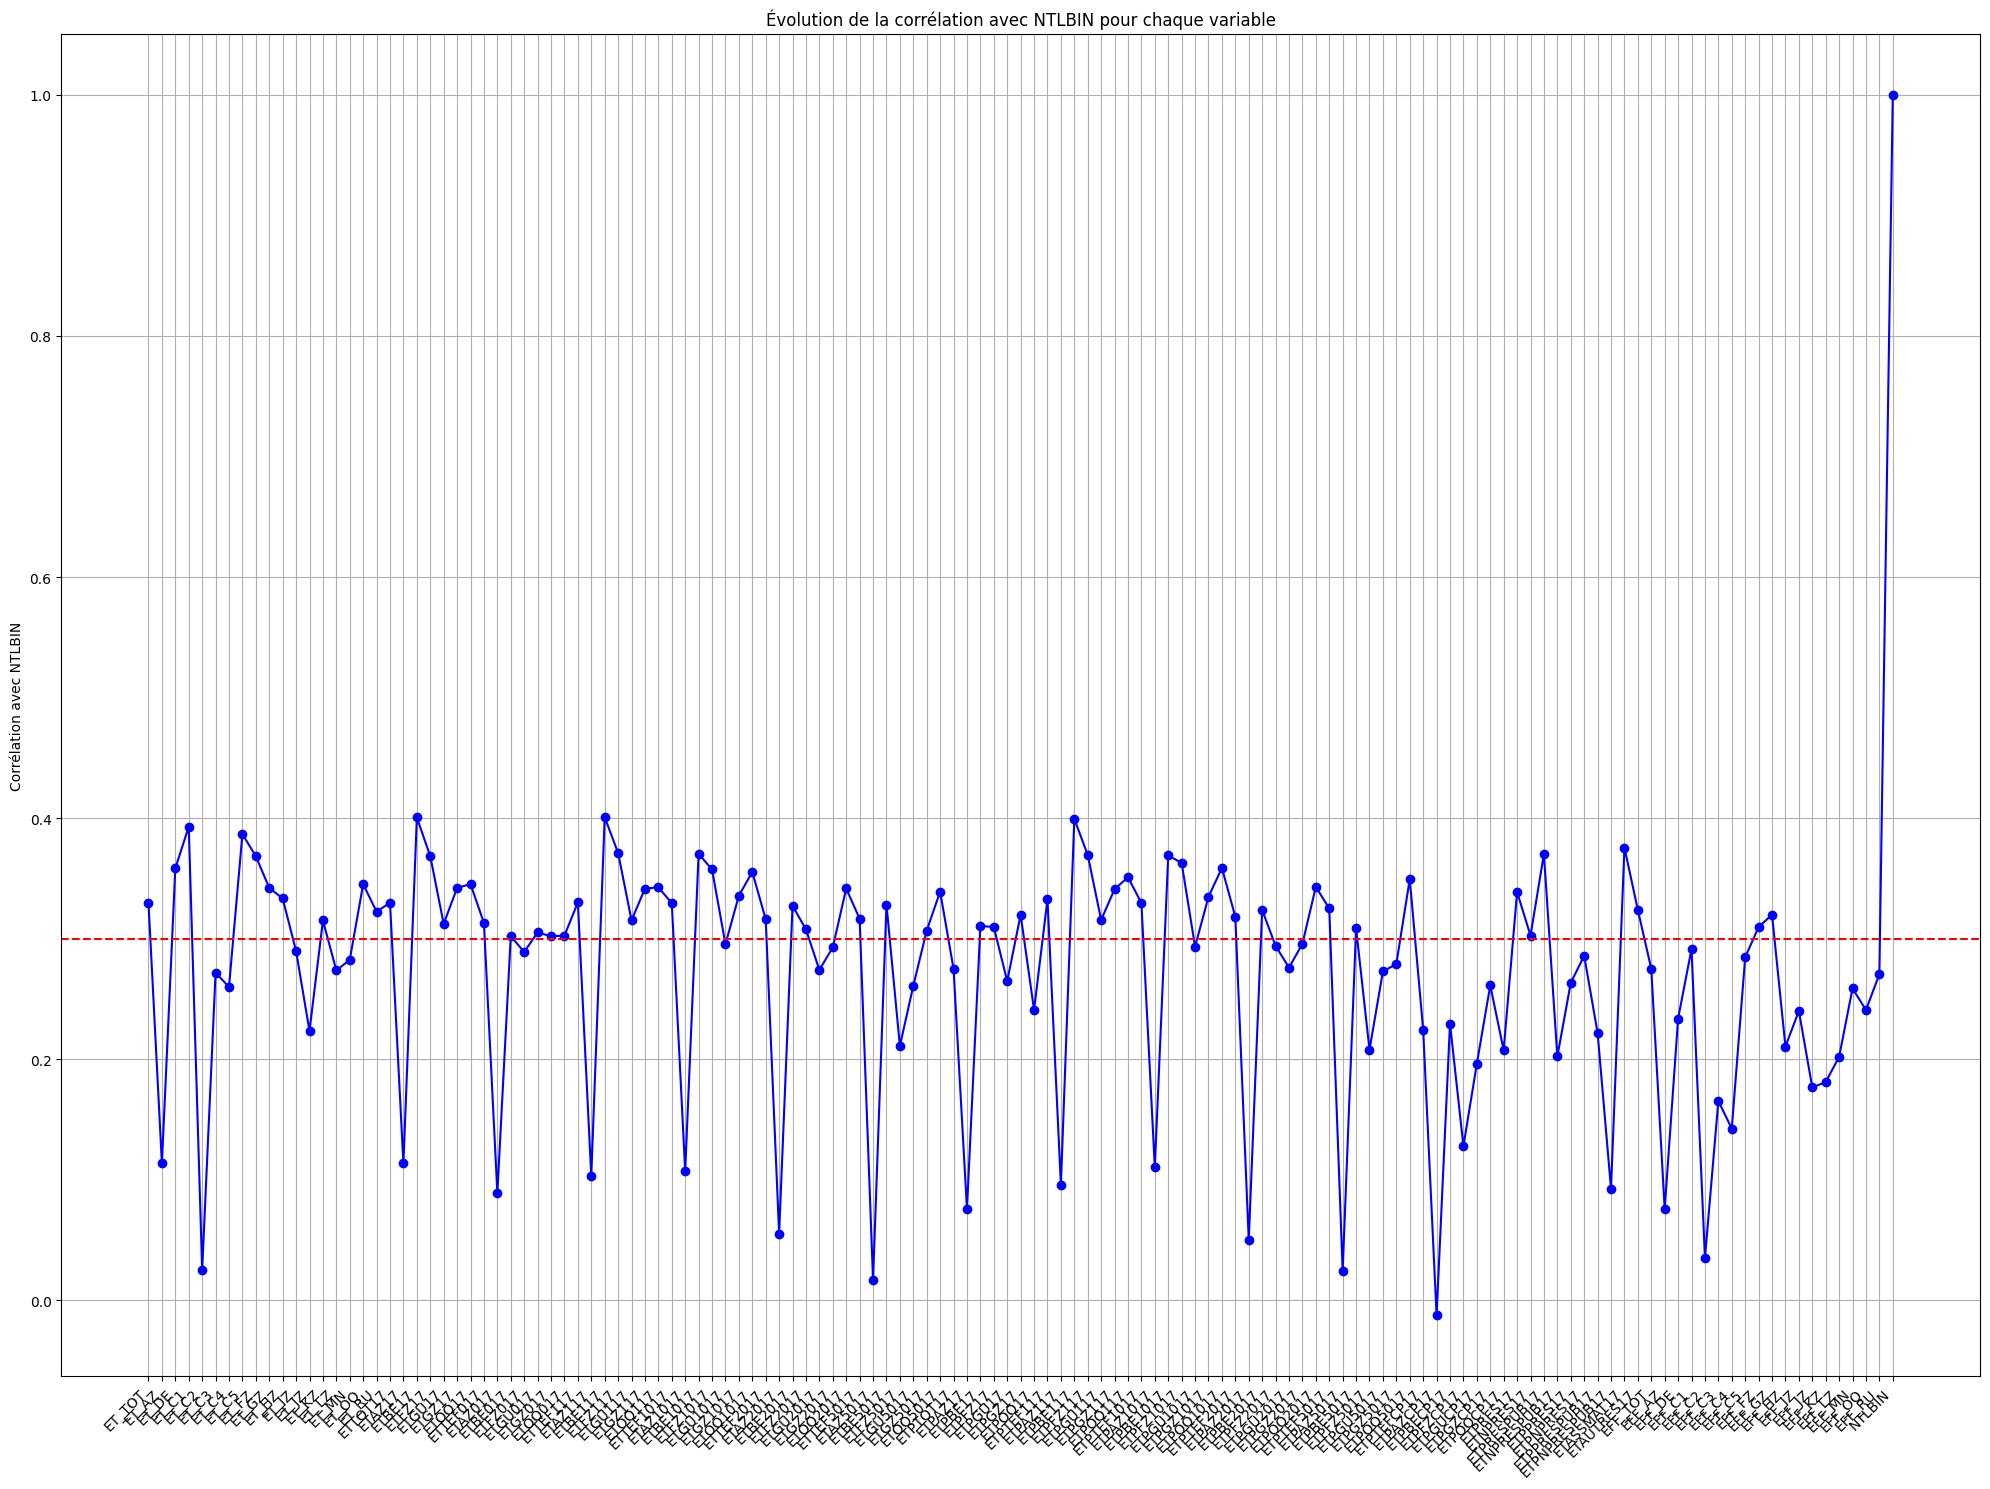

In [10]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé

high_vif_threshold = 10



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


In [30]:
Z=X.columns
print(Z)

Index(['ET_C2', 'ET_C3', 'ET_C4', 'ETAZ017', 'ETBE017', 'ETFZ017', 'ETGZ017',
       'ETAZ117', 'ETAZ1017', 'ETAZ5017', 'ETPBE1017', 'ETPFZ1017',
       'ETPBE2017', 'ETPFZ2017', 'ETPBE5017', 'ETPFZ5017', 'ETPGZ5017',
       'ETPAZCP17', 'ETPFZCP17', 'ETPGZCP17', 'ETPOQCP17', 'ETPRESPUB17',
       'ETNPRESPUB17', 'ETPNPRESPUB17', 'ETASSMAT17', 'EFF_DE', 'EFF_C1',
       'EFF_C2', 'EFF_C3', 'EFF_C4', 'EFF_C5', 'EFF_HZ', 'EFF_JZ', 'EFF_KZ'],
      dtype='object')


In [33]:
colonnes=[]
for txt in Z:
    colonnes.append(txt)


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())



c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[819   7]
 [ 28   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       826
           1       0.53      0.22      0.31        36

    accuracy                           0.96       862
   macro avg       0.75      0.61      0.65       862
weighted avg       0.95      0.96      0.95       862


Accuracy Score:
0.9593967517401392


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


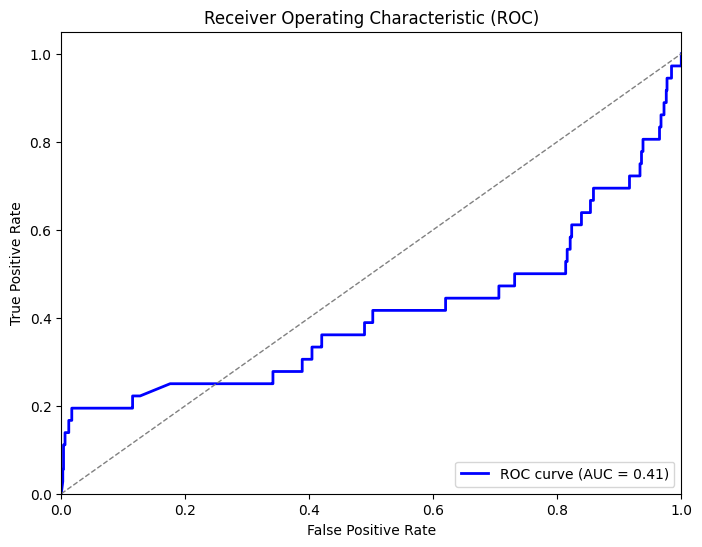

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()